In [90]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [91]:
housing_df=pd.read_csv('housing.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Text(0.5, 0, 'House values')

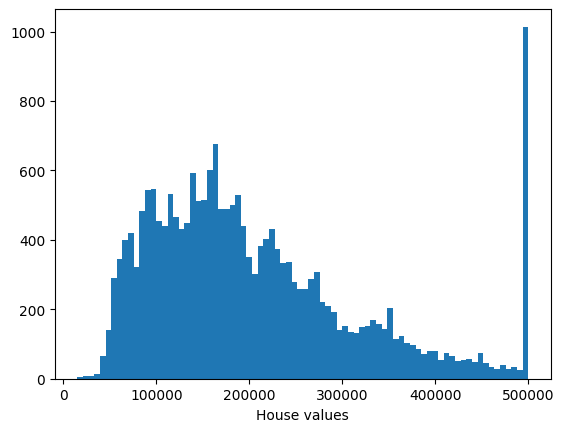

In [92]:
plt.hist(housing_df['median_house_value'],bins=80)
plt.xlabel('House values')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

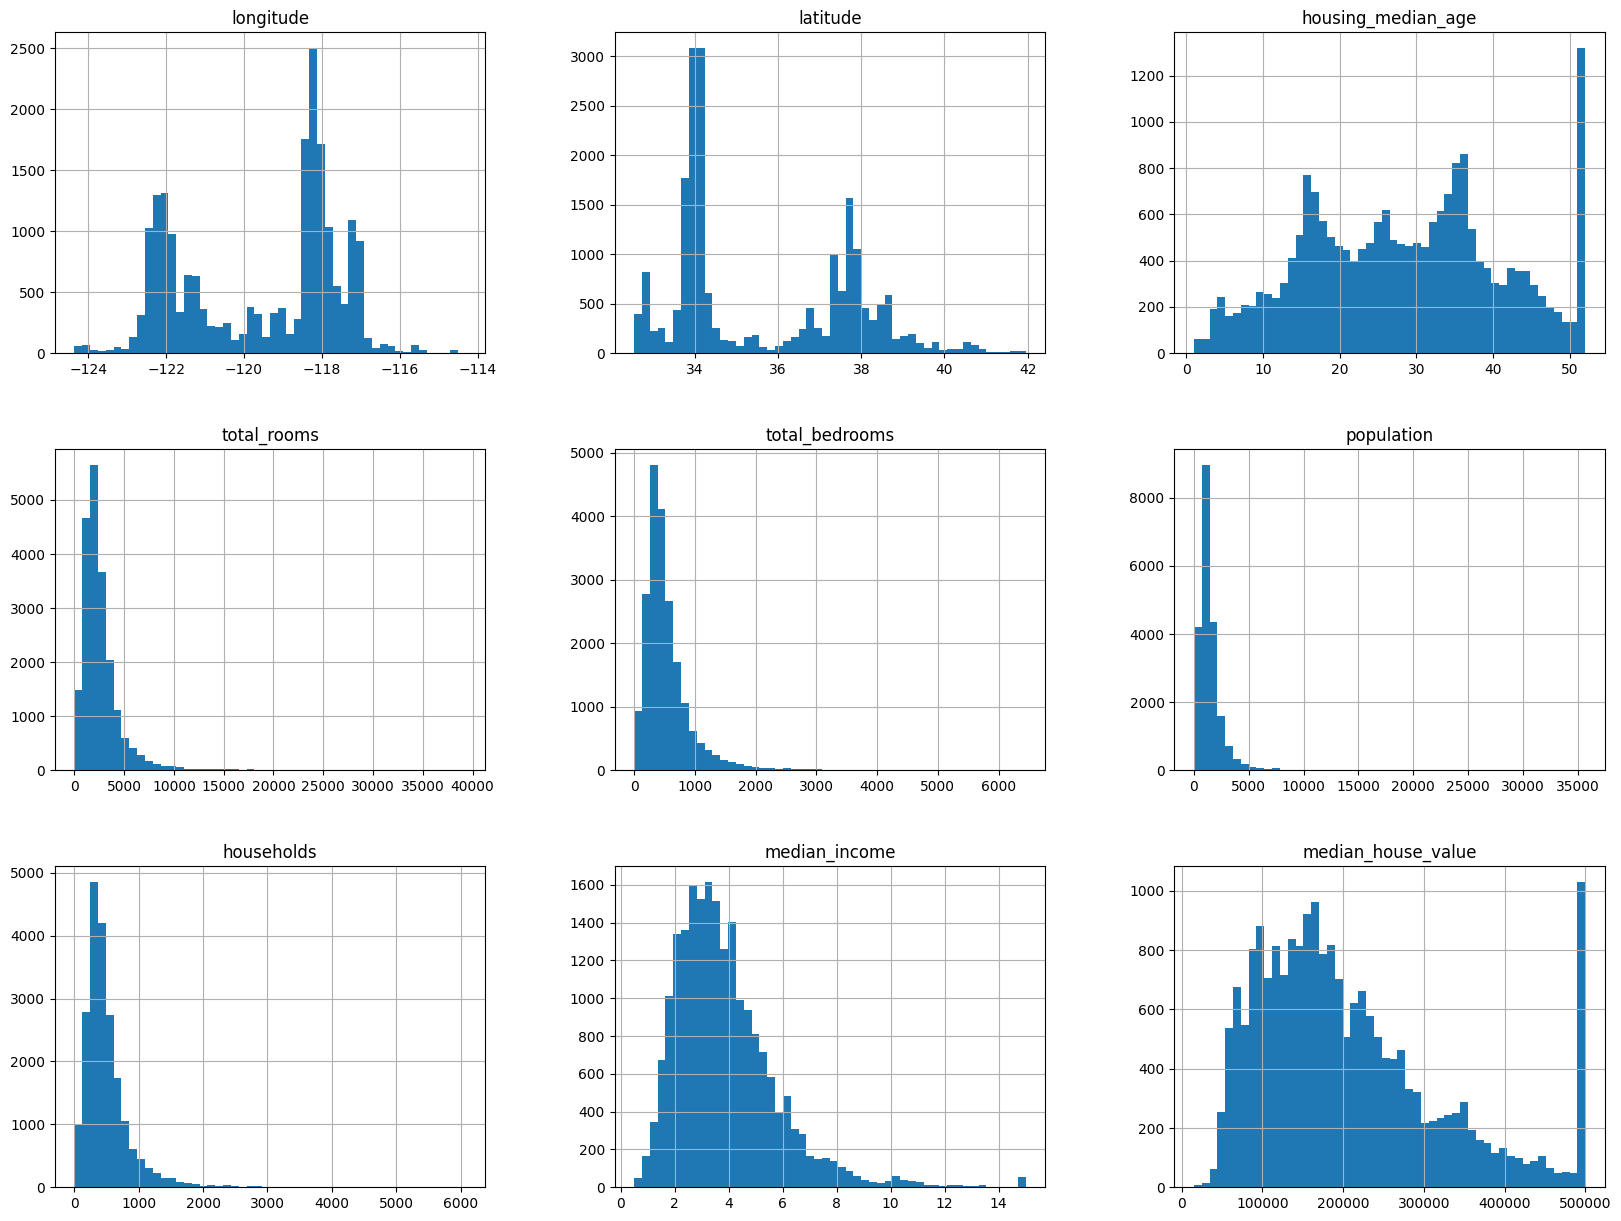

In [93]:
housing_df.hist(bins=50,figsize=(20,15))

In [94]:
numeric_df = housing_df.select_dtypes(include=[np.number])  # Selects only numeric columns
corr = numeric_df.corr()
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

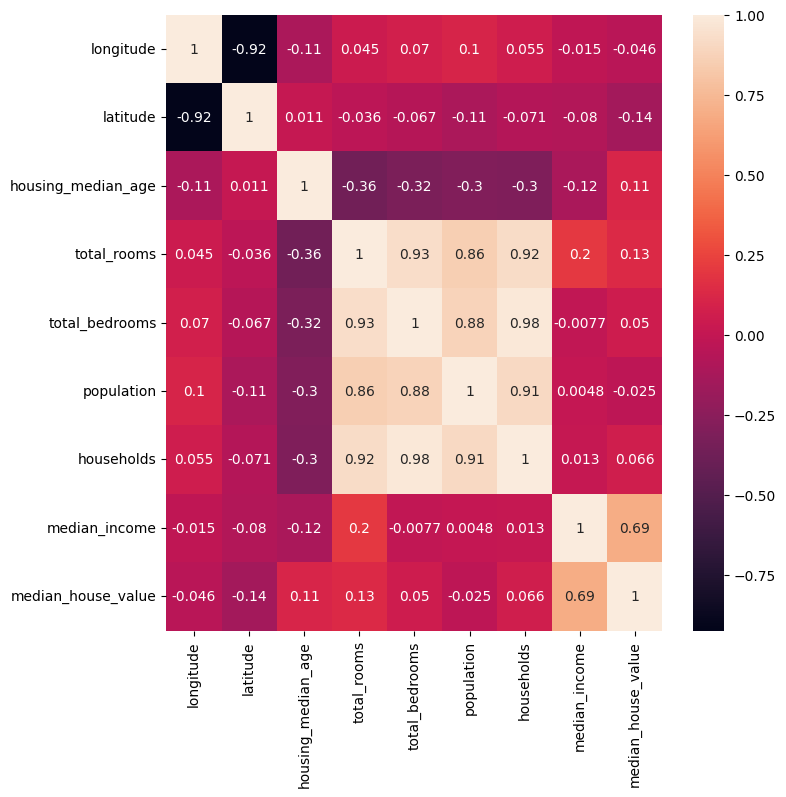

In [95]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)
plt.show()

In [96]:
numeric_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [97]:
numeric_df['total_bedrooms'].isnull().sum()/numeric_df.shape[0]*100

np.float64(1.002906976744186)

In [98]:
#the above gives the percentage of missing data

In [99]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [100]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [101]:
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [102]:
housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [103]:
#FIRST WE WILL FILL IN THE MISSING VALUES WITH KNN IMPUTER THEN WE WILL SPLIT THE DATA

In [104]:
#WE WILL USE 70-30 RULE WHERE WE TRAIN THE MODEL 70% OF SAMPLE TEST WITH REMAINING 30% OF DATA

In [105]:
#LET US ASSIGN X WITH ARRAY INPUT AND Y FOR ARRAY OUTPUTS

In [106]:
numeric_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [107]:
from sklearn.impute import KNNImputer
housing_df_temp = numeric_df.copy()
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]
housing_df_temp = housing_df_temp[new_column_list]
#now the data is ready to pass to knn imputer

In [108]:
imputer=KNNImputer(n_neighbors=5)
housing_df_temp_imputed=imputer.fit_transform(housing_df_temp)
housing_df_imputed=numeric_df.copy()
housing_df_imputed[new_column_list] = housing_df_temp_imputed
print(housing_df_imputed)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [109]:
#Now the data is ready to be split

In [216]:
from sklearn.model_selection import train_test_split
X = housing_df_imputed.drop(columns=['median_house_value'])
y = housing_df_imputed['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [217]:
#Let us use linear regression to estimate the median income value

In [218]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [219]:
#to make predictions

In [220]:
y_pred = model.predict(X_test)
print(y_pred)

[ 75696.33491152 166304.33789222 265032.93786053 ... 439178.19697503
 130408.85287046 175272.25192552]


In [221]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

51835.734726283146
5052953703.901625
5052953703.901625
0.6143987268246027


In [173]:
#LET US CHECK HOW THE MODEL HAS PERFORMED VS ACTUAL VALUE IN GRAPH

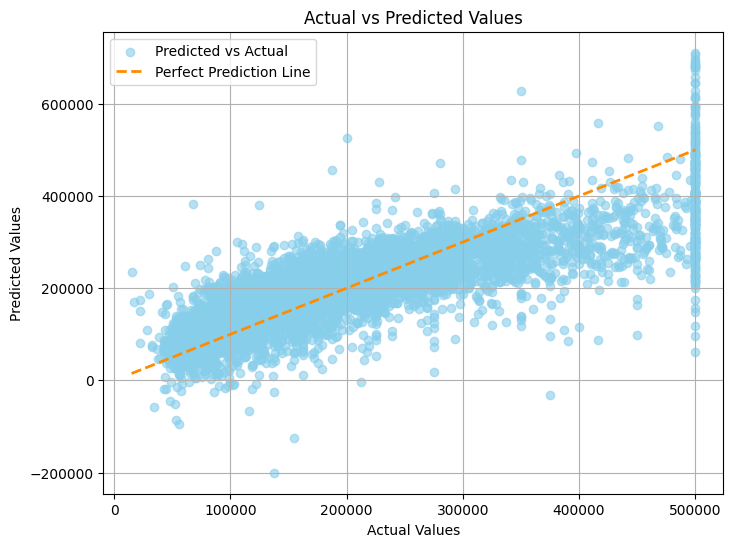

In [166]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='darkorange', linestyle='--', linewidth=2, label='Perfect Prediction Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [157]:
#LET US SEE ONE EXAMPLE

In [158]:
#change index value for each row in dataset condition to predict
index = 6
actual_value = y_test.iloc[index]  
predicted_value = y_pred[index]

print(f"Index: {index}")
print(f"Actual Value: {actual_value}")
print(f"Predicted Value: {predicted_value}")

Index: 6
Actual Value: 198200.0
Predicted Value: 299018.3977732826
